
## Introduction



The dataset used in this project provides insights into phone sales from an online auction platform. It includes various attributes for each phone, such as the manufacturing date, model, brand, type, customer ratings, price, and battery health. 
Each record provides details such as:

- **date**: Manufacturing date of the phone (Categorical - DateTime format).
- **model**: The model name of the phone (Categorical).
- **company**: Manufacturer of the phone (Categorical - e.g., Apple, Samsung, Google).
- **type**: Type of phone (Categorical - e.g., iPhone, android).
- **rating**: The rating given to the phone on the auction website (Numerical - range 0-5).
- **price**: The price of the phone in USD (Numerical).
- **battery_health**: The remaining battery health percentage (Numerical - range 0-100).


This rich dataset offers a unique opportunity to explore trends in the secondary market for smartphones, where factors like brand reputation, device condition, and customer feedback significantly impact pricing and demand.

The goal of this analysis is to uncover patterns in pricing, customer preferences, and product performance. By examining these factors, we can better understand how different phone brands and models perform in the auction space. The insights gained from this analysis can inform buyers, sellers, and platform operators about key drivers of value in the market.

Through data visualization and trend analysis, this project will tell a cohesive story about the phones sold on the platform, highlighting popular brands, pricing trends, and correlations between features like ratings and battery health. The ultimate objective is to derive actionable insights that can enhance decision-making for both consumers and stakeholders.



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
class Phone:
    def __init__(self, date, model, company, phone_type, rating, price, battery_health):
        self.date = date
        self.model = model
        self.company = company
        self.type = phone_type
        self.rating = rating
        self.price = price
        self.battery_health = battery_health
        self.unique_id = id(self)  # Unique identifier based on memory address

    def __str__(self):
        return f"{self.unique_id},{self.date},{self.model},{self.company},{self.type},{self.rating},{self.price},{self.battery_health}"


class ApplePhone(Phone):
    def __init__(self, date, model, company, rating, price, battery_health):
        super().__init__(date, model, company, "iPhone", rating, price, battery_health)


class AndroidPhone(Phone):
    def __init__(self, date, model, company, rating, price, battery_health):
        super().__init__(date, model, company, "android", rating, price, battery_health)


class IPhone(ApplePhone):
    def __init__(self, date, model, rating, price, battery_health):
        super().__init__(date, model, "IPhone", rating, price, battery_health)


class Google(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
        super().__init__(date, model, "Google", rating, price, battery_health)


class Samsung(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
        super().__init__(date, model, "Samsung", rating, price, battery_health)

In [18]:
google_phone = Google("2022-11-15", "Pixel 7", 4.5, 641, 86.06)
print(str(google_phone))

5806221184,2022-11-15,Pixel 7,Google,android,4.5,641,86.06


## Reading the pickle file
The code reads a pickled file ('Phonepkl638200308.dat') 
containing a list of Phone auction objects using the pickle module and prints the number of objects in the list.

In [21]:
import pickle

file_name = 'Phonepkl638200308.dat'

with open(file_name, 'rb') as file:
    objects = pickle.load(file)

for obj in objects[:5]:
    print(obj)

csv_file_name = 'data.csv'
with open(csv_file_name, 'w') as f:
    f.write("unique_id,date,model,company,type,rating,price,battery_health\n")
    for obj in objects:
        f.write(str(obj) + '\n')


135246861516512,2022-01-22,Galaxy 6,Samsung,android,2,,
135246861503936,2022-08-23,Galaxy 6,Samsung,android,1,1499,86.91
135246861507872,2022-08-25,Galaxy 6,Samsung,android,1,1147,59.21
135246861506576,2022-06-01,Pixel 6,Google,android,2,1165,55.28
135246861507824,2022-01-03,Galaxy 6,Samsung,android,1,1226,60.13


# Reading dataset
The dataset has 10,000 rows and 8 columns

In [24]:
data = pd.read_csv('data.csv')
data

,unique_id,date,model,company,type,rating,price,battery_health
0,135246861516512,2022-01-22,Galaxy 6,Samsung,android,2.0,NaN,NaN
1,135246861503936,2022-08-23,Galaxy 6,Samsung,android,1.0,1499.0,86.91
2,135246861507872,2022-08-25,Galaxy 6,Samsung,android,1.0,1147.0,59.21
3,135246861506576,2022-06-01,Pixel 6,Google,android,2.0,1165.0,55.28
4,135246861507824,2022-01-03,Galaxy 6,Samsung,android,1.0,1226.0,60.13
...,...,...,...,...,...,...,...,...
9995,135246864394048,2022-02-24,Pixel 6,Google,android,1.0,NaN,NaN
9996,135246864394096,2022-04-18,Galaxy 6,Samsung,android,2.0,803.0,37.45
9997,135246864394144,2022-02-16,Pixel 5,Google,android,2.0,1331.0,49.02
9998,135246864394192,2022-02-04,Galaxy 5,Samsung,android,2.0,1314.0,54.19


In [26]:
data.shape

(10000, 8)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       10000 non-null  int64  
 1   date            9596 non-null   object 
 2   model           10000 non-null  object 
 3   company         10000 non-null  object 
 4   type            10000 non-null  object 
 5   rating          9571 non-null   float64
 6   price           9200 non-null   float64
 7   battery_health  9200 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB




## Handling Missing Values
The dataset contained some missing values:
- **Categorical Variables**: For columns like `model`, `company`, and `type`, missing values were replaced with the mode (most frequent value).
- **Numerical Variables**: Columns like `rating`, `price`, and `battery_health` were imputed with the median to avoid the influence of outliers.

For categorical Variables nothing is added as there are no NA values. Only for date, all rows are dropped for NA values.
Numerical Variables are replaced with median, mean and mode

In [31]:
null_counts = data.isnull().sum()
print("Null counts in each column:")
print(null_counts)

Null counts in each column:
unique_id           0
date              404
model               0
company             0
type                0
rating            429
price             800
battery_health    800
dtype: int64


In [33]:
null_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of missing data in each column:")
print(null_percentage)


Percentage of missing data in each column:
unique_id         0.00
date              4.04
model             0.00
company           0.00
type              0.00
rating            4.29
price             8.00
battery_health    8.00
dtype: float64


The dataset has 10,000 records in total. Of this, 404 records (4.04%) has missing date values. Replacing date with mode significantly 
alters the perception of information that the other columns have. For example, price is dependent on the date of purchase and battery health
and changing the date will affect the price prediction for further use cases of this data set.
Since there is no meaningful way to replace the missing values by mode as we do for categorical values,
we dropped those records from the data set. The cleaned dataset for date attributes now has 9596 records



In [36]:

data_cleaned = data.dropna(subset=['date'])
print("Shape of the dataset after removing rows with missing 'date':", data_cleaned.shape)

null_counts = data_cleaned.isnull().sum()
print("Null counts in each column:")
print(null_counts)

Shape of the dataset after removing rows with missing 'date': (9596, 8)
Null counts in each column:
unique_id           0
date                0
model               0
company             0
type                0
rating            412
price             783
battery_health    783
dtype: int64




Out of the 9596 records in the cleaned dataset, we have 412 records for missing rating, 783 records for missing price,and 783 for battery health. 
The price of the phone is dependent on the manufacturer (company), the model and the year. If we apply the mode to the
entire dataset it inaccurately reflects the price.
Therefore, our approach to handling this, is to use the mean for a specific group that includes records by company, model and year.
And we have used median for the battery health and mode for rating.
 


In [41]:
data_cleaned = data_cleaned.copy()

data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
data_cleaned['year'] = data_cleaned['date'].dt.year

grouped_price_mean = data_cleaned.groupby(['company', 'model', 'year'])['price'].transform('mean')
data_cleaned['price'] = data_cleaned['price'].fillna(grouped_price_mean)
print("Remaining missing values in 'price':", data_cleaned['price'].isnull().sum())

grouped_battery_health = data_cleaned.groupby(['company', 'model', 'year'])['battery_health'].transform('median')
data_cleaned['battery_health'] = data_cleaned['battery_health'].fillna(grouped_battery_health)
print("Remaining missing values in 'battery_health':", data_cleaned['battery_health'].isnull().sum())

data_cleaned = data_cleaned.drop(columns=['year'])

def safe_mode(series):
    mode_value = series.mode()
    return mode_value[0] if not mode_value.empty else None
grouped_rating_mode = data_cleaned.groupby(['company', 'model'])['rating'].transform(safe_mode)
data_cleaned['rating'] = data_cleaned['rating'].fillna(grouped_rating_mode)
print("Remaining missing values in 'rating':", data_cleaned['rating'].isnull().sum())

print("Null counts in each column:")
print(data_cleaned.isnull().sum())


Remaining missing values in 'price': 0
Remaining missing values in 'battery_health': 0
Remaining missing values in 'rating': 0
Null counts in each column:
unique_id         0
date              0
model             0
company           0
type              0
rating            0
price             0
battery_health    0
dtype: int64


In [43]:
data_cleaned.to_csv('data_cleaned.csv', index=False)
print("Cleaned dataset saved to 'data_cleaned.csv'")

Cleaned dataset saved to 'data_cleaned.csv'


In [45]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9596 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   unique_id       9596 non-null   int64         
 1   date            9596 non-null   datetime64[ns]
 2   model           9596 non-null   object        
 3   company         9596 non-null   object        
 4   type            9596 non-null   object        
 5   rating          9596 non-null   float64       
 6   price           9596 non-null   float64       
 7   battery_health  9596 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 674.7+ KB


# Data Exploration and Visualization
## Visualizing the dataset to gain insights into the data

In [48]:
# Load the cleaned dataset
data_cleaned = pd.read_csv('data_cleaned.csv')

## Bar Chart
**Visualize average number of phones by company**


/var/folders/jm/5v960m9s64zb20bp7sz5w91h0000gn/T/ipykernel_46809/2908610244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_counts, x='company', y='count', palette="pastel", width=0.5)


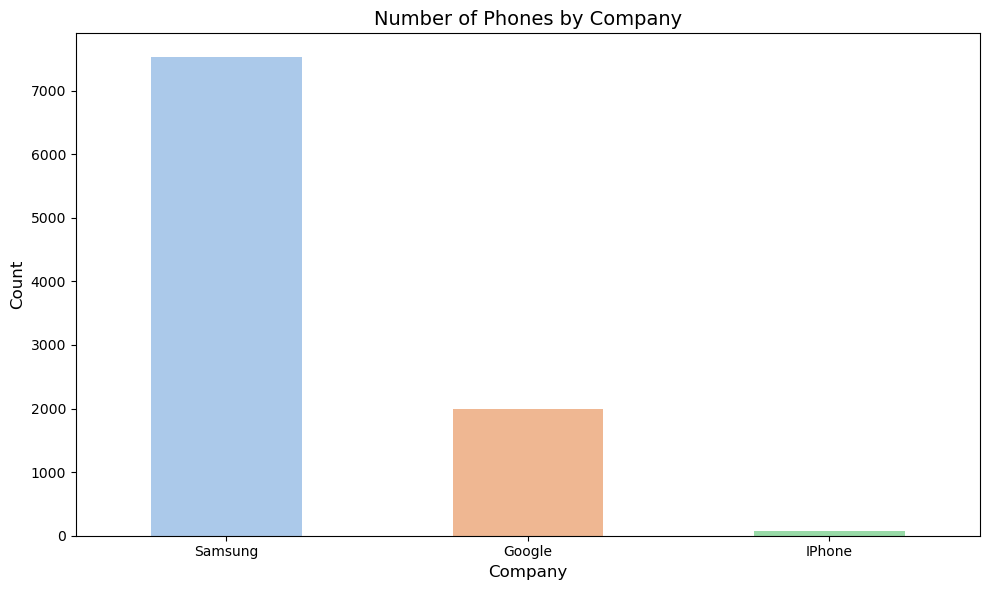

In [86]:
# Visualization 1: Bar Chart
company_counts = data_cleaned['company'].value_counts().reset_index()
company_counts.columns = ['company', 'count']
 
plt.figure(figsize=(10, 6))
sns.barplot(data=company_counts, x='company', y='count', palette="pastel", width=0.5)
plt.title("Number of Phones by Company", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


This bar chart represents the distribution of phones by company, showing the count of phones manufactured by each brand (Samsung, Google, iPhone).
The chart highlights a market disparity where Samsung dominates the auction platform and limited data for Apple in this dataset.
It also raises questions about dataset balance and whether it accurately reflects real-world market dynamics.



## Box Plot
**Visualize Price distribution by Company**

The boxplot is an effective way to visualize key statistics around a distribution, including median, quartiles, range, and potential outliers.

Segmenting this by experience allows comparison of level of price distributions across the companies. We can observe differences in center, spread, range and shapes of the distributions.

The graph is a box plot showing the Price Distribution by Company for Samsung, Google, and iPhone.

/var/folders/jm/5v960m9s64zb20bp7sz5w91h0000gn/T/ipykernel_46809/3885677618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='company', y='price', palette="pastel")


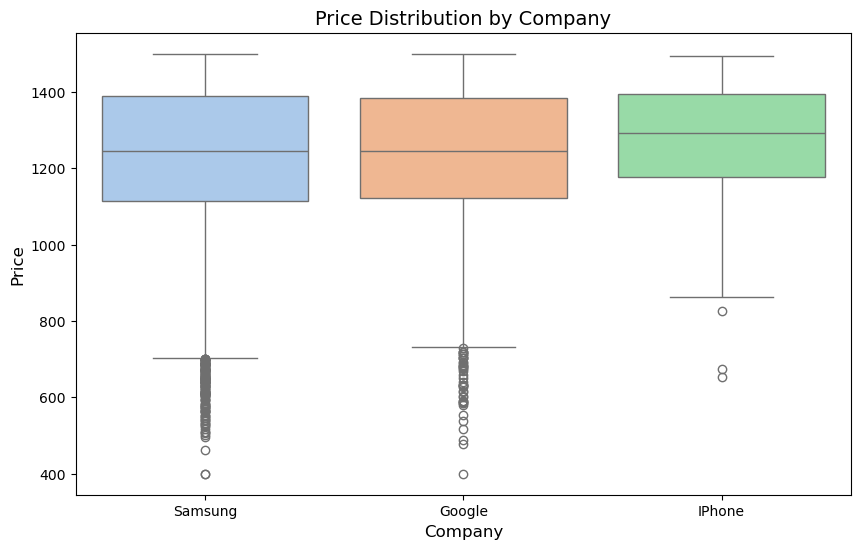

In [88]:
# Visualization 2: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='company', y='price', palette="pastel")
plt.title("Price Distribution by Company", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

This boxplot illustrates the distribution of phone prices for Samsung, Google, and iPhone, showcasing the median price, interquartile range (IQR), and outliers for each company.
The median price is relatively similar across all three companies, suggesting comparable pricing strategies or product positioning in this dataset.
Samsung shows a wider price range with significant variability, evident from the larger IQR and more outliers below the lower whisker. This suggests a mix of budget and premium models.Google displays a slightly narrower IQR, indicating less variability and a more focused pricing strategy.iPhone has the narrowest IQR but higher overall price consistency, indicating that Apple primarily targets the premium segment.

•	Samsung caters to a broader range of customers, while Google and iPhone appear more focused on mid-range to premium pricing.

•	The presence of numerous outliers for Samsung and Google may indicate higher competition in the budget segment, while Apple maintains exclusivity.



## Line Chart
**Analyze Average Price changes over time**

By visualizing the price metric over time for all company, this allows us to analyze for any trends, cycles, or abnormalities in prices given. A smoothly increasing line would imply consistent improvement, spikes imply sudden changes needing investigation, etc.

The line chart enables consumption of this time series data for analysis and monitoring of an important variable. Sorting the data and plotting against date is crucial to uncover temporal patterns.

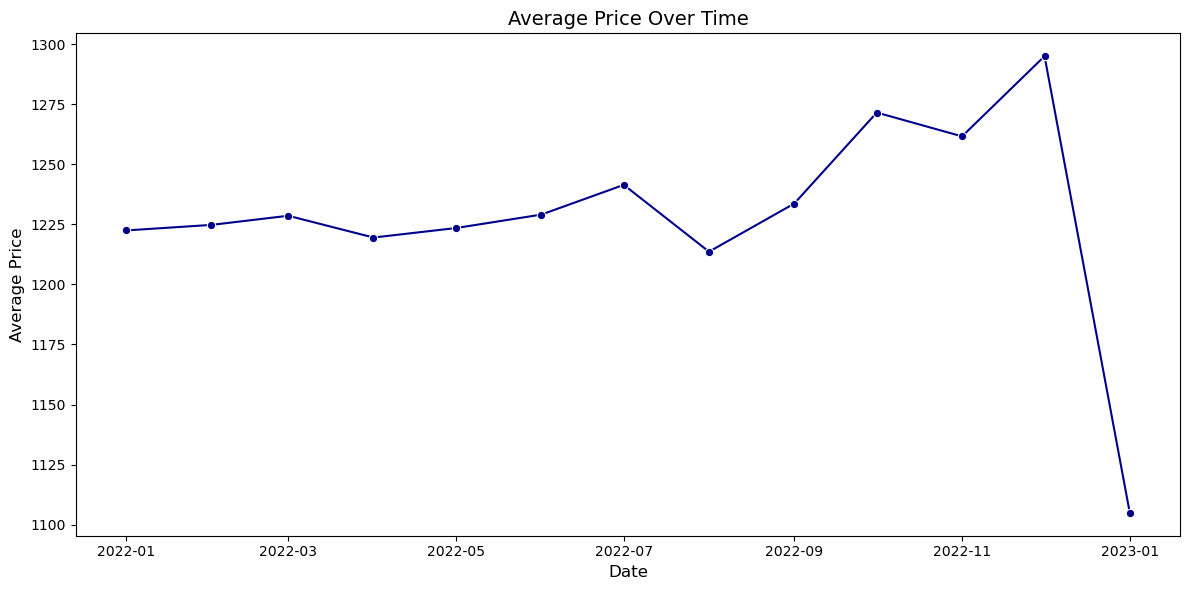

In [90]:
# Visualization 3: Line Plot
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
plt.figure(figsize=(12, 6))
price_over_time = data_cleaned.groupby(data_cleaned['date'].dt.to_period("M"))['price'].mean()
price_over_time.index = price_over_time.index.to_timestamp()

sns.lineplot(x=price_over_time.index, y=price_over_time.values, marker='o', color='darkblue')
plt.title('Average Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.tight_layout()
plt.show()

This line plot illustrates how the average price of phones has changed over time from early 2022 to early 2023.
Insights:
•	Stability in pricing suggests consistent market conditions for most of the year, with occasional fluctuations likely driven by seasonal demand or product cycles.
•	The sharp price drop in early 2023 warrants further investigation to understand if this trend is due to discounts, inventory clearance, or other market factors.


## PieChart
**Visualize category distributions**

This creates pie charts to visualize the distribution of values in categorical columns in the dataset.

In this case with 'company' as the category, it will generate a pie chart with breakdown of the different percentage of phones in the dataset and their relative proportions.
This helps easily visualize the composition of categorical variables in the data. The code could be reused and extended to create distribution plots for any other categorical columns as well.

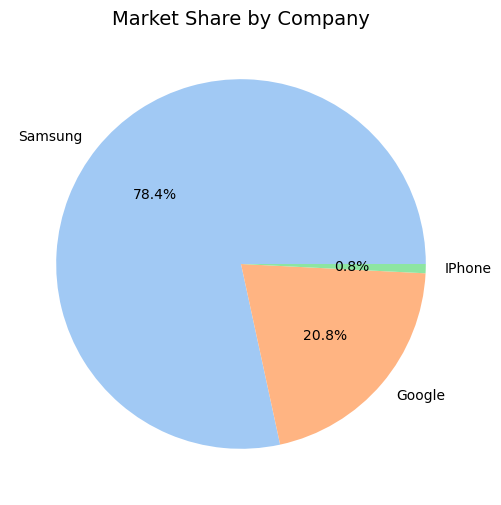

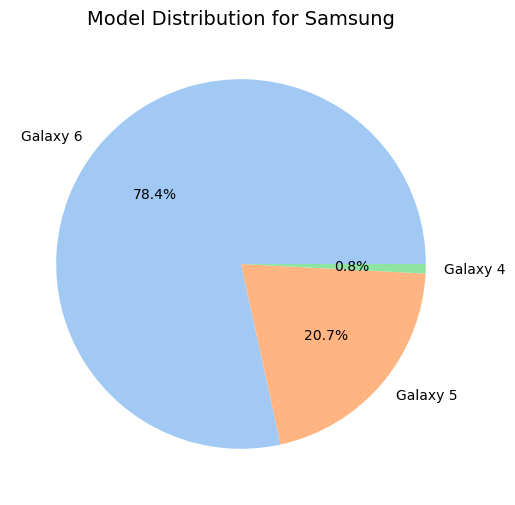

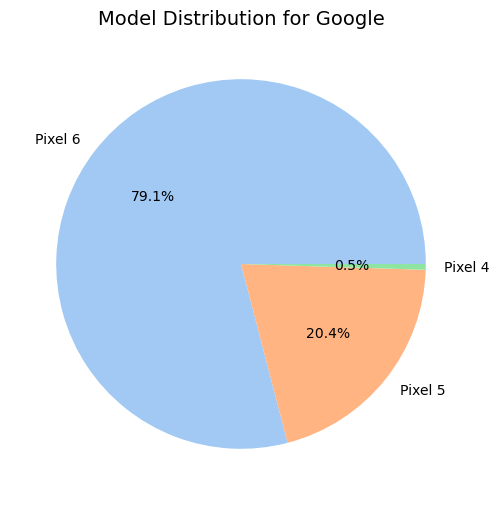

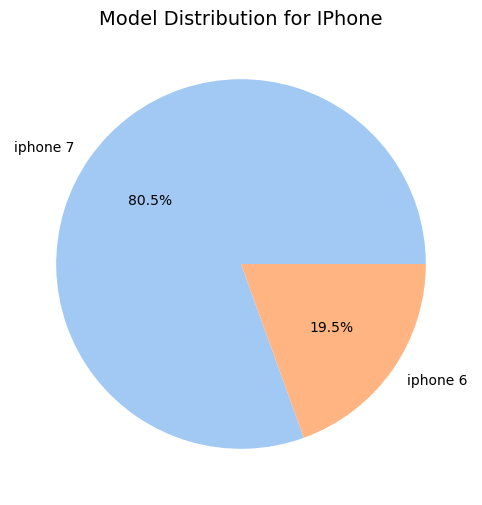

In [92]:
# Visualization 4: Pie Chart

plt.figure(figsize=(10, 6))
data_cleaned['company'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Market Share by Company", fontsize=14)
plt.ylabel("")
plt.show()

for company in data_cleaned['company'].unique():
    company_data = data_cleaned[data_cleaned['company'] == company]
    plt.figure(figsize=(10, 6))
    company_data['model'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(f"Model Distribution for {company}", fontsize=14)
    plt.ylabel("")
    plt.show()


## Histogram
**Visualize price distribution**

Visualizing the price distribution as a histogram allows easy analysis of the spread, skew, shape, and characteristics of this key continuous variable. The overlaid density curve also helps identify peaks and probability density.

This is an exploratory step to understand properties of an important variable in the dataset. The visualization and any insights drawn can help guide data cleaning, feature engineering, and modeling choices.

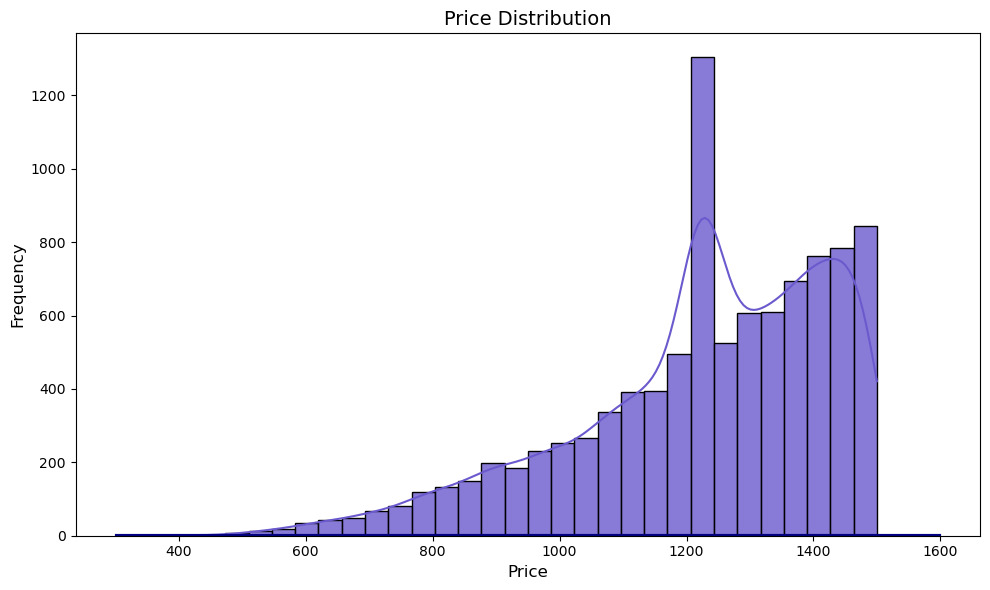

In [66]:
# Visualization 5: Histogram
plt.figure(figsize=(10, 6))
sns.histplot( data_cleaned['price'], bins=30, color='slateblue', kde=True, alpha=0.8 )
sns.kdeplot( data_cleaned['price'], color='navy', linewidth=3 )

plt.title("Price Distribution", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()




This histogram shows the distribution of phone prices on the auction website. The x-axis represents the price of phones, while the y-axis indicates the frequency of listings at each price point. A density line is overlaid to visualize the overall trend.
Insight:
The distribution is right-skewed, indicating that while most phones are priced between $800 and $1,400, a significant number of high-priced phones (above $1,400) contribute to a long tail. The peak frequency appears just under $1,500, suggesting a clustering of premium devices at this price range.

The concentration of listings around higher price points may reflect demand for premium models, such as flagship iPhones and high-end Android devices. Sellers may also prioritize these price ranges based on perceived value or market trends.


## Scatter Plot
**Visualize relationship between rating and price**

This generates a scatter plot with rating and price data points.
It allows visual analysis of the relationship between rating and price, with each data point colored by title. Lower alpha helps compare densities.

This helps understand interactions between continuous variables and see segmentation across a categorical variable through multivariate visualization.

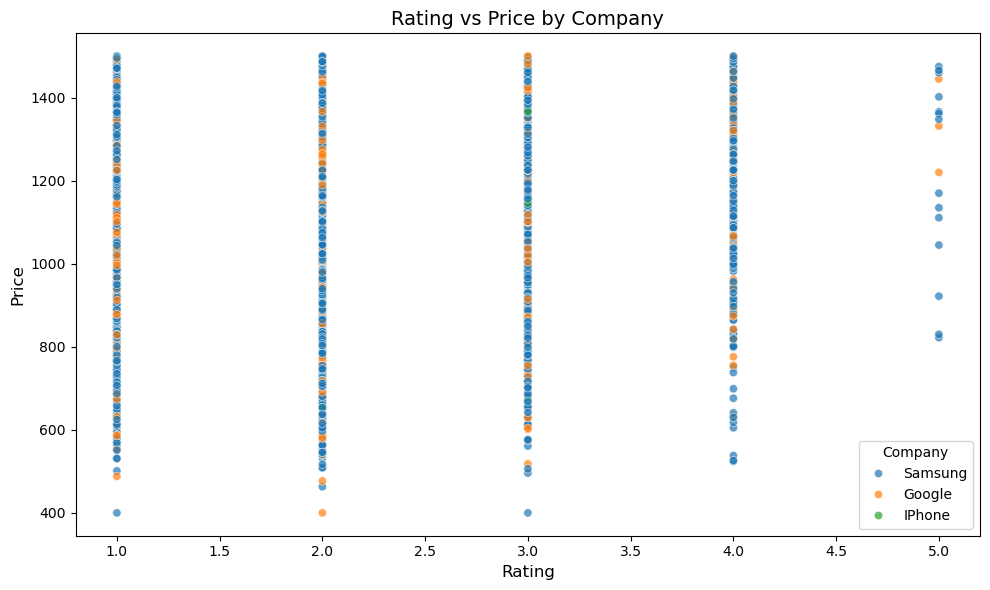

In [70]:
# Visualization 6: Scatter Plot

plt.figure(figsize=(10, 6))
sns.scatterplot( data=data_cleaned, x='rating', y='price', hue='company', palette='tab10', alpha=0.7 )
plt.title("Rating vs Price by Company", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title="Company")
plt.tight_layout()
plt.show()


This scatter plot displays the relationship between phone ratings and prices, categorized by company (Samsung, Google, and iPhone). The x-axis represents customer ratings, while the y-axis shows phone prices.
Higher-rated phones, particularly from premium brands like Apple and Samsung, command higher prices. This could indicate that consumers are willing to pay more for well-reviewed devices or that better-rated devices tend to be newer or better maintained.


## Heat Map

**Uncovering Patterns: A Heatmap of Average Phone Ratings**

The heatmap visualizes the average rating for each phone model, segmented by company, in a grid-like format. It provides a comparative analysis of user ratings across different brands and their respective models.

The color encoding and annotations make it easy to identify trends and patterns:
Dark Blue Shades represent higher average ratings, indicating user preference or satisfaction for certain models under specific companies.
Light Shades denote relatively lower ratings, highlighting models that might not meet user expectations.

This heatmap acts as an analytical summary of how different companies and their models perform in terms of user satisfaction. By visually aggregating the ratings, it surfaces insights into the relative quality of models across companies. It offers actionable information for both manufacturers aiming to improve their offerings and consumers looking for top-rated options.

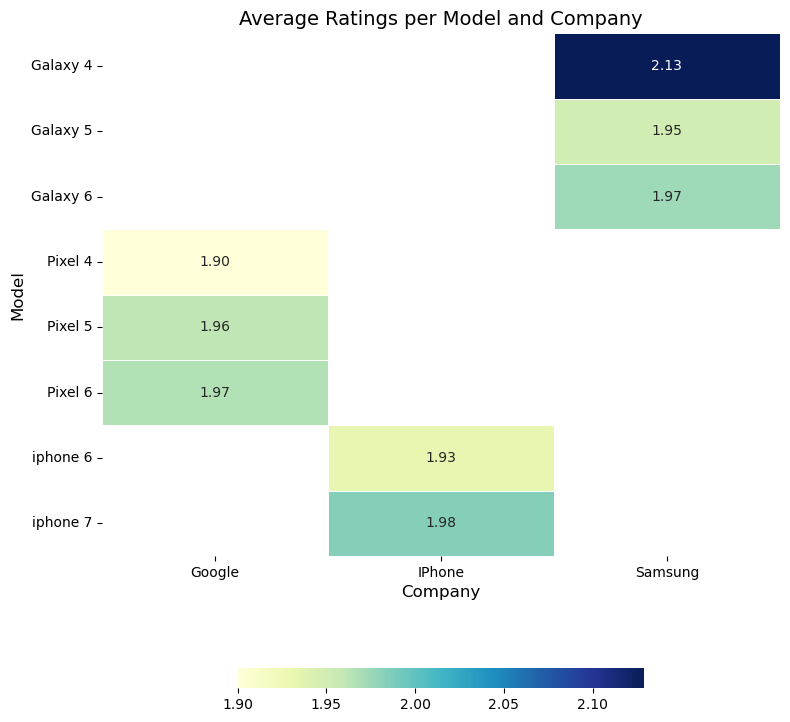

In [74]:
# Visualization 7: Heat Map
heatmap_data = data_cleaned.pivot_table( index='model', columns='company', values='rating', aggfunc='mean' )
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5, cbar=True, cbar_kws={
        'orientation': 'horizontal',
        'shrink': 0.6,
        'pad': 0.15
    })
plt.title('Average Ratings per Model and Company', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()



## Conclusion
From the analysis:
1. Apple phones have the highest average price, indicating a strong demand for premium devices.
2. Ratings are generally higher for iPhones and Samsung models, while Google's ratings are more varied.
3. Battery health significantly impacts the price; phones with better battery health are priced higher.
4. Most phones are rated between 3-5 stars, showing overall customer satisfaction.


## Recommendations
1. Include additional features such as `storage`, `RAM`, or `camera specifications` to better understand what influences price.
2. Collect more data to ensure balanced representation across phone types and companies.
3. Provide more detailed customer feedback to better correlate ratings with features.
4. Address any inconsistencies in the dataset, such as incomplete or ambiguous `model` names.
